In [12]:
import urllib.request, urllib.parse, urllib.error
from bs4 import BeautifulSoup
from re import sub
import string
from urllib.request import urlopen
import pandas as pd
import numpy as np
import requests

In [2]:
url = 'https://www.basketball-reference.com/awards/mvp.html'

table_html = str((BeautifulSoup(urlopen(url), 'html.parser').findAll('table', id = 'mvp_NBA')[0]))


In [3]:
df_MVP = pd.read_html(table_html)[0]

df_MVP.columns = df_MVP.columns.droplevel(0)
df1_MVP = df_MVP[['Player', 'Age']]
df2_MVP = df_MVP[['Player', 'PTS', 'TRB', 'AST']]


In [4]:
MVP_age = (df1_MVP['Age'].sum())/66
print('Average MVP age:', round(MVP_age, 2))

MVP_ppg = (df2_MVP['PTS'].sum())/66
print('Average MVP PPG:', round(MVP_ppg, 2))

MVP_ast = (df2_MVP['AST'].sum())/66
print('Average MVP APG:', round(MVP_ast, 2))

MVP_RPG = (df2_MVP['TRB'].sum())/66
print('Average MVP RPG:', round(MVP_RPG, 2))

oldest = df1_MVP['Age'].describe()
print('Oldest MVP age:', oldest)

Average MVP age: 27.55
Average MVP PPG: 26.48
Average MVP APG: 5.72
Average MVP RPG: 12.4
Oldest MVP age: count    67.000000
mean     27.134328
std       2.907126
min      22.000000
25%      25.000000
50%      27.000000
75%      29.000000
max      35.000000
Name: Age, dtype: float64


In [5]:
url = 'https://www.basketball-reference.com/contracts/LAC.html'

table_html = str((BeautifulSoup(urlopen(url), 'html.parser').findAll('table', id = 'contracts')[0]))

In [6]:
df_salary = pd.read_html(table_html)[0]
df_salary.columns = df_salary.columns.droplevel(0)

df1_salary = df_salary[['Player', 'Age', '2021-22', 'Guaranteed']]
df1_salary

,Player,Age,2021-22,Guaranteed
0,Paul George,32.0,"$39,344,970","$127,477,703"
1,Kawhi Leonard,30.0,"$39,344,900","$127,477,476"
2,Marcus Morris,32.0,"$15,627,907","$49,116,279"
3,Norman Powell,29.0,"$15,517,242","$90,000,000"
4,Robert Covington,31.0,"$12,975,471","$36,975,471"
5,Luke Kennard,25.0,"$12,727,273","$41,236,364"
6,Reggie Jackson,32.0,"$10,384,500","$21,599,760"
7,Ivica Zubac,25.0,"$7,518,518","$7,518,518"
8,Nicolas Batum,33.0,"$3,170,029","$3,170,029"
9,Rodney Hood,29.0,"$2,239,544","$2,239,544"


In [7]:
df1_salary['2021-22'] = df1_salary['2021-22'].apply(lambda x: x.replace('$', '').replace(',', '')
                                if isinstance(x, str) else x).astype(float)

df1_salary['Guaranteed'] = df1_salary['Guaranteed'].apply(lambda x: x.replace('$', '').replace(',', '')
                                if isinstance(x, str) else x).astype(float)

<ipython-input-7-2e793da30f7f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_salary['2021-22'] = df1_salary['2021-22'].apply(lambda x: x.replace('$', '').replace(',', '')
<ipython-input-7-2e793da30f7f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_salary['Guaranteed'] = df1_salary['Guaranteed'].apply(lambda x: x.replace('$', '').replace(',', '')


In [8]:
average_salary = (df1_salary.at[len(df1_salary) -1, '2021-22'])/(len(df1_salary)-1)
print(round(average_salary, 2))

average_age = (df1_salary.at[len(df1_salary) - 1, 'Age'])/(len(df1_salary) - 1)
print(round(average_age, 2))

8752236.68
nan


In [12]:
url_curry = 'https://www.basketball-reference.com/players/c/curryst01.html'

table_html_curry = str((BeautifulSoup(urlopen(url_curry), 'html.parser').findAll('table', id = 'per_game')[0]))

url_miller = 'https://www.basketball-reference.com/players/m/millere01.html'

table_html_miller = str((BeautifulSoup(urlopen(url_miller), 'html.parser').findAll('table', id = 'per_game')[0]))

In [13]:
df_curry = pd.read_html(table_html_curry)[0]

df1_curry = df_curry.iloc[0:17, [0, 1, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]]

df_miller = pd.read_html(table_html_miller)[0]

df1_miller = df_miller.iloc[0:17, [0, 1, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]]

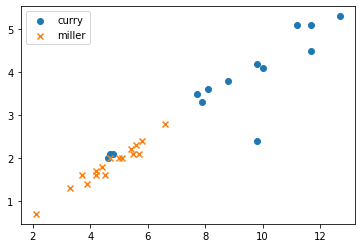

In [21]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(x = df1_curry['3PA'], y = df1_curry['3P'], marker = 'o', label = 'curry')
ax1.scatter(x = df1_miller['3PA'], y = df1_miller['3P'], marker = 'x', label = 'miller')
plt.legend()
plt.show()


In [26]:
data = pd.DataFrame()


for year in range(1977, 2021):
    url = f"https://www.basketball-reference.com/leagues/NBA_{year}_standings.html"
    page = requests.get(url)
    
    soup = BeautifulSoup(page.content, "html.parser")
    table_E = soup.find(
        lambda tag: tag.name == "table"
        and tag.has_attr("id")
        and tag["id"] == "confs_standings_E"
        )

    table_E_head = table_E.find("thead").findAll("tr")[1]
    table_E_body = table_E.find("tbody").findAll("tr")

    # extracts data from table head
    column_headers = [th.getText() for th in table_E_head]
    filtered_column_headers = list(filter(lambda t: t != " ", column_headers))[1:]

    # actual data from the table
    team_data = [
        [td.getText() for td in table_E_body[i].findAll("td")]
        for i in range(len(table_E_body))
        ]

    df = pd.DataFrame(team_data, columns=filtered_column_headers)
    df["Year"] = year
    data = pd.concat([data, df])
    print(year)
    
data.to_csv('../data/teams.csv')

AttributeError: 'NoneType' object has no attribute 'find'

In [ ]:
for year in range(1977, 2021):
    url = f"https://www.basketball-reference.com/leagues/NBA_{year}_standings.html"
    page = requests.get(url)
    
    soup = BeautifulSoup(page.content, "html.parser")
    table_E = soup.find(
        lambda tag: tag.name == "table"
        and tag.has_attr("id")
        and tag["id"] == "confs_standings_E"
        
    table_W = soup.find(
        lambda tag: tag.name == "table"
        and tag.has_attr("id")
        and tag["id"] == "confs_standings_W"